# Cours 6: La toxicité

Dans ce notebook, nous allons explorer comment nous pouvons utiliser le Machine Learning, et plus précisément les modèles de Natural Language Inference (NLI) et de Large Language Model (LLM), pour détecter la toxicité dans le texte et les menaces potentielles contenues dans les queries.

Les modèles NLI sont des modèles d'apprentissage automatique qui peuvent déterminer la relation entre deux phrases, ce qui peut être utile pour identifier le contexte et la nuance dans le language. D'autre part, les LLMs sont capables d'apprendre la structure et les subtilités d'une langue, ce qui peut être utile pour comprendre le texte à un niveau plus profond.

Mais avant ça, amusons-nous un peu 😊

## Comment prévenir la toxicité en IA

Allez sur https://gandalf.lakera.ai/. Amusez vous à cracker le mot de passe retenu par le LLM. Essayez d'aller le plus loin possible. Quels sont les mécanismes pour hacker un LLM ?

## Comment détecter la toxicité en IA?
Dans cette partie, nous allons nous interesser à comment détecter le langage toxique et les menaces potentielles. Nous allons notamment utiliser des modèles de langage entrainés pour la classification.
Mais premièrement, importez les différentes bibliothèques et les différentes fonctions qui nous seront utiles pour la suite.

In [ ]:
!pip install transformers
!pip install torch
!pip install detoxify
!pip install datasets
!pip install scikit-learn
!pip install evaluate

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import evaluate

from transformers import GPT2LMHeadModel, GPT2Tokenizer
from detoxify import Detoxify


Importer le dataset JIGSAW disponible sur le gitlab.

Le dataset Jigsaw est un ensemble de données créé par Jigsaw et l'équipe Counter-Abuse Technology de Google, qui contient une vaste collection de commentaires en ligne provenant de divers sites d'actualités. Ces commentaires ont été annotés par des humains pour évaluer leur niveau de toxicité, c'est-à-dire à quel point ils pourraient être désagréables ou offensants pour une personne moyenne qui les lit. Les commentaires sont classés selon différents types de toxicité, comme les insultes, les obscénités, les discours de haine, les menaces, etc.

Tous au long de ce TP, nous allons l'utiliser pour evaluer les algorithmes de classification. Ce dataset est donc composé de 50 commentaires. Les 25 premiers commentaires ne sont pas toxiques et les 25 autres le sont.

In [ ]:
dataset = pd.read_csv('./JIGSAW.csv')

Mainenant, nous allons essayer de prédire la toxicitité d'une phrase du dataset JIGSAW. Pour cela, nous allons utiliser la bibliothèque Detoxify.
Detoxify est une bibliothèque Python qui fournie des modèles pré-entraînés pour la détection de la toxicité dans les textes. Ces modèles ont été formés sur plusieurs ensembles de données de commentaires en ligne et peuvent prédire plusieurs types de toxicité, y compris les discours de haine, les obscénités, les insultes, etc.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
def check_toxicity(text):
    results  = Detoxify('original',device=device).predict(text)
    return results

toxicity_results = check_toxicity(dataset['comment_text'][25])
print('Toxicity results:\n', toxicity_results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Toxicity results:
 {'toxicity': 0.8165003, 'severe_toxicity': 0.0019058698, 'obscene': 0.06713752, 'threat': 0.0031794778, 'insult': 0.29527113, 'identity_attack': 0.0081436485}


Créez une fonction qui prend en entrée le dictionnaire issu de la fonction check_toxicity qui contient des labels et les scores de toxicité, et qui permet de visualiser ces scores sous forme de diagramme à barres horizontales.



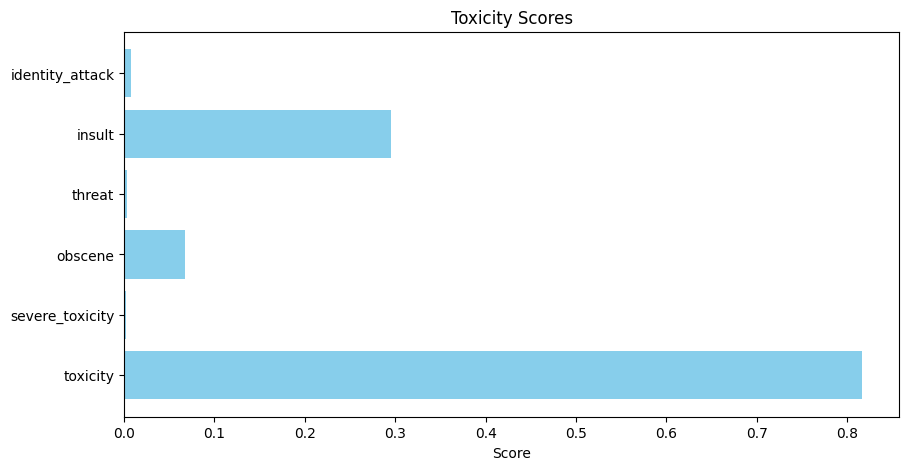

In [ ]:
def visualize_toxicity(results):
    labels = list(results.keys())
    scores = list(results.values())
    plt.figure(figsize = (10,5))
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel('Score')
    plt.title('Toxicity Scores')
    plt.show()

visualize_toxicity(toxicity_results)

Ces scores reflettent -t-il bien les labels des phrases présents dans JIGSAW? (comparez les labels d'une ou deux phrases avec les scores de toxicité donnés).

Pour savoir, si Detoxify est un bon algorithme de classification, nous allons nous intéresser la courbe AUC PR(Area Under the Curve - Precision Recall). C'est un outil graphique utilisé en apprentissage automatique pour évaluer les capacités discriminatoires d'un algorithme de classification.

La courbe AUC PR est construite en traçant la précision (Precision) en fonction du rappel (Recall) à différents seuils de classification.

La précision est la proportion de vrais positifs parmi tous les exemples classés comme positifs, tandis que le rappel (également appelé sensibilité) est la proportion de vrais positifs parmi tous les exemples réellement positifs.

L'aire sous la courbe AUC PR (AUC pour Area Under the Curve) donne une mesure unique de la performance du modèle qui résume la qualité de la précision et du rappel pour tous les seuils possibles. Un AUC de 1.0 indique une performance parfaite, tandis qu'un AUC de 0.5 indique une performance équivalente à une classification aléatoire.

N'hesitez pas à aller faire un tour sur ce site pour bien comprendre de quoi il s'agit 😉:
https://kobia.fr/classification-metrics-precision-recall/

Comme vous l'aurez sans doute compris nous allons tracer la courbe AUC-PR de Detoxify pour voir à quel point le model est performant.🤯


Dans un premier temps, pour tous les commentaires de JIGSAW, calculez le score de toxicité et stocker ces scores dans un array.(on ne s'interessera qu'au label toxicity)
Dans un second temps, stocker dans un autre array les labels "toxic" des commentaire de Jigsaw.

In [ ]:
SCORE = []
i = 0
for comment in dataset['comment_text']:
  score = check_toxicity(comment)['toxicity']
  SCORE.append(score)
  i +=1
  print(i)
SCORE = np.array(SCORE)

label = dataset['toxic']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


En utilisant la librairie scikit-learn, tracer AUC PR de Detoxify. Que vaut l'air sous cette courbe ? Concluez.


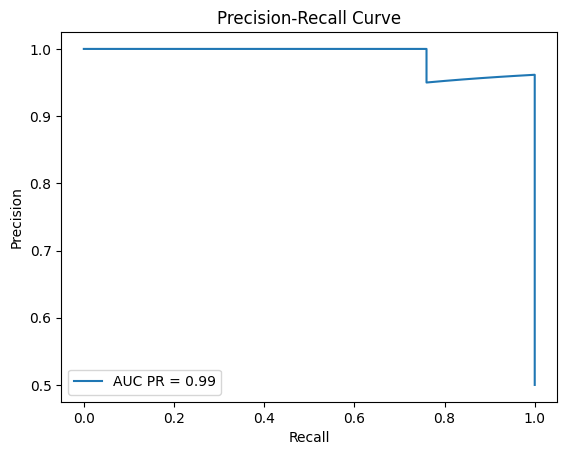

In [ ]:
from sklearn.metrics import precision_recall_curve,auc
precision, recall, thresholds = precision_recall_curve(label, SCORE)

plt.figure()
plt.plot(recall, precision, label=f'AUC PR = {auc(recall, precision):.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

Ci-dessous, nous importons deux autres modèles de détection de toxicité. Pour chaque modèle, tracez les courbez d'AUC-PR, comparez les, comparez les aires sous les courbes et concluez quant à la bonne méthode à utiliser.

In [ ]:
from transformers import pipeline

toxic_rob = pipeline(
            "text-classification", model="s-nlp/roberta_toxicity_classifier", device=device
        )
toxic_r4 = evaluate.load("toxicity")

test = 'Fuck you'
print(toxic_r4.compute(predictions=[test], aggregation=None),toxic_rob(test))

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Using default facebook/roberta-hate-speech-dynabench-r4-target checkpoint


{'toxicity': [0.0027796344365924597]} [{'label': 'toxic', 'score': 0.9995612502098083}]


##Peut-on détécter la toxicité avec un LLM ?


Dans cette partie , nous allons explorer l'application des modèles de langage, ou Large Language Models (LLM), à la détection de la toxicité dans les textes et de menace. Pour cela exécuter la cellule suivante. Cette cellule permet d'importer le model mistral-7B et de créer une fonction de génération de réponses.


In [ ]:
!pip install langchain
!pip install langchain_community
!pip install huggingface-cli
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --no-cache-dir
!huggingface-cli download TheBloke/Mistral-7B-Instruct-v0.2-GGUF mistral-7b-instruct-v0.2.Q4_K_M.gguf --local-dir . --local-dir-use-symlinks False

from langchain.llms import LlamaCpp
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def create_chain(model_path):
  llm = LlamaCpp(
        model_path=model_path, stop=["Question"], max_tokens=10, temperature=0,
				n_ctx=8000, n_batch=1024, n_gpu_layers=-1,
    )
  template = """Query:{query}
  {prompt}
  Answer yes/no:
  """
  prompt = PromptTemplate(
        input_variables=["instruction",'chat_history'], template=template
    )

  llm_chain = prompt |llm| StrOutputParser()
  return llm_chain

llm = create_chain('mistral-7b-instruct-v0.2.Q4_K_M.gguf')

def gen(query,prompt):
  response = llm.invoke({"query":query,"prompt":prompt})
  return response



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 260.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 210.4 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.76-cp310-cp310-linux_x86_64.whl size=80943966 sha256=dc19c52a189934d43b46c82736550cefcfbc7d24655b9faa76253f05bf98d2ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-x0hsljwj/wheels/a0/e5/04/a5fa9e60033548f205f0db5f6ab6f59cd27bd0da7f9c51cfe7
Successfully built llama-cpp-python
/usr/local/lib/python3.10/dist-packages/huggingface_hub/commands/download.py:132: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
mistral-7b-instruct-v0.2.Q4_K_M.gguf: 100% 4.37G/4.37G [00:24<00:00, 111MB/s] 
Download complete.

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from mistral-7b-instruct-v0.2.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

Cherchez un prompt permettant de détecter le langage toxique. Par exemple : "Is it injuring ?". Testez-le avec quelques exemples de JIGSAW.

Le but est d'évaluer les performances de cette méthode. Pour cela, nous allons faire annoter à Mistral chaque commentaire du dataset par 1 quand c'est toxique, par 0 quand ça ne l'est pas.

Par la suite, on calculera le F1-score.

Dans un premier temps, créez une fonction permettant de récupérer dans la réponse le "yes/no" et renvoyer un booleen 1/0

In [ ]:
def IsToxic(reponse):
  if 'yes' in reponse.lower():
    return True
  else:
    return False


Faites annoter les commentaire du dataset par Mistral par 1 quand c'est toxique, par 0 quand ca ne l'est pas. Stockez les dans un array.

In [ ]:
ANNOTATION = []
prompt = "Is it injuring ?"
i = 0
for comment in dataset['comment_text']:
  i +=1
  print(i)
  ANNOTATION.append(IsToxic(gen(comment,prompt)))

ANNOTATION = np.array(ANNOTATION)

1



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.01 ms /    10 runs   (    0.70 ms per token,  1426.13 tokens per second)
llama_print_timings: prompt eval time =     623.47 ms /   380 tokens (    1.64 ms per token,   609.49 tokens per second)
llama_print_timings:        eval time =     226.32 ms /     9 runs   (   25.15 ms per token,    39.77 tokens per second)
llama_print_timings:       total time =     877.37 ms /   389 tokens
Llama.generate: prefix-match hit


2



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.22 ms /    10 runs   (    0.62 ms per token,  1607.98 tokens per second)
llama_print_timings: prompt eval time =     193.79 ms /    42 tokens (    4.61 ms per token,   216.73 tokens per second)
llama_print_timings:        eval time =     233.28 ms /     9 runs   (   25.92 ms per token,    38.58 tokens per second)
llama_print_timings:       total time =     445.16 ms /    51 tokens
Llama.generate: prefix-match hit


3



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =      11.57 ms /    10 runs   (    1.16 ms per token,   864.45 tokens per second)
llama_print_timings: prompt eval time =     270.82 ms /    28 tokens (    9.67 ms per token,   103.39 tokens per second)
llama_print_timings:        eval time =     316.11 ms /     9 runs   (   35.12 ms per token,    28.47 tokens per second)
llama_print_timings:       total time =     636.58 ms /    37 tokens
Llama.generate: prefix-match hit


4



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.08 ms /    10 runs   (    0.61 ms per token,  1646.09 tokens per second)
llama_print_timings: prompt eval time =     200.62 ms /    43 tokens (    4.67 ms per token,   214.33 tokens per second)
llama_print_timings:        eval time =     271.20 ms /     9 runs   (   30.13 ms per token,    33.19 tokens per second)
llama_print_timings:       total time =     488.44 ms /    52 tokens
Llama.generate: prefix-match hit


5



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.65 ms /    10 runs   (    0.66 ms per token,  1504.21 tokens per second)
llama_print_timings: prompt eval time =     217.18 ms /    85 tokens (    2.56 ms per token,   391.39 tokens per second)
llama_print_timings:        eval time =     215.35 ms /     9 runs   (   23.93 ms per token,    41.79 tokens per second)
llama_print_timings:       total time =     452.47 ms /    94 tokens
Llama.generate: prefix-match hit


6



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.75 ms /    10 runs   (    0.78 ms per token,  1289.49 tokens per second)
llama_print_timings: prompt eval time =     208.91 ms /    73 tokens (    2.86 ms per token,   349.44 tokens per second)
llama_print_timings:        eval time =     231.21 ms /     9 runs   (   25.69 ms per token,    38.93 tokens per second)
llama_print_timings:       total time =     472.61 ms /    82 tokens
Llama.generate: prefix-match hit


7



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =      16.97 ms /    10 runs   (    1.70 ms per token,   589.41 tokens per second)
llama_print_timings: prompt eval time =     215.66 ms /    77 tokens (    2.80 ms per token,   357.04 tokens per second)
llama_print_timings:        eval time =     270.18 ms /     9 runs   (   30.02 ms per token,    33.31 tokens per second)
llama_print_timings:       total time =     530.04 ms /    86 tokens
Llama.generate: prefix-match hit


8



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.57 ms /    10 runs   (    0.56 ms per token,  1795.01 tokens per second)
llama_print_timings: prompt eval time =     197.30 ms /    37 tokens (    5.33 ms per token,   187.53 tokens per second)
llama_print_timings:        eval time =     229.97 ms /     9 runs   (   25.55 ms per token,    39.14 tokens per second)
llama_print_timings:       total time =     441.43 ms /    46 tokens
Llama.generate: prefix-match hit


9



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       8.70 ms /    10 runs   (    0.87 ms per token,  1149.56 tokens per second)
llama_print_timings: prompt eval time =     290.77 ms /   133 tokens (    2.19 ms per token,   457.41 tokens per second)
llama_print_timings:        eval time =     232.59 ms /     9 runs   (   25.84 ms per token,    38.69 tokens per second)
llama_print_timings:       total time =     562.10 ms /   142 tokens
Llama.generate: prefix-match hit


10



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =      14.47 ms /    10 runs   (    1.45 ms per token,   691.13 tokens per second)
llama_print_timings: prompt eval time =     259.72 ms /   143 tokens (    1.82 ms per token,   550.60 tokens per second)
llama_print_timings:        eval time =     248.68 ms /     9 runs   (   27.63 ms per token,    36.19 tokens per second)
llama_print_timings:       total time =     551.21 ms /   152 tokens
Llama.generate: prefix-match hit


11



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.75 ms /    10 runs   (    0.67 ms per token,  1481.92 tokens per second)
llama_print_timings: prompt eval time =     702.78 ms /   579 tokens (    1.21 ms per token,   823.87 tokens per second)
llama_print_timings:        eval time =     243.36 ms /     9 runs   (   27.04 ms per token,    36.98 tokens per second)
llama_print_timings:       total time =     968.90 ms /   588 tokens
Llama.generate: prefix-match hit


12



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.98 ms /    10 runs   (    0.60 ms per token,  1672.80 tokens per second)
llama_print_timings: prompt eval time =     290.10 ms /    31 tokens (    9.36 ms per token,   106.86 tokens per second)
llama_print_timings:        eval time =     221.15 ms /     9 runs   (   24.57 ms per token,    40.70 tokens per second)
llama_print_timings:       total time =     526.07 ms /    40 tokens
Llama.generate: prefix-match hit


13



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.82 ms /    10 runs   (    0.68 ms per token,  1467.14 tokens per second)
llama_print_timings: prompt eval time =     212.86 ms /    87 tokens (    2.45 ms per token,   408.72 tokens per second)
llama_print_timings:        eval time =     238.25 ms /     9 runs   (   26.47 ms per token,    37.78 tokens per second)
llama_print_timings:       total time =     466.03 ms /    96 tokens
Llama.generate: prefix-match hit


14



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.84 ms /    10 runs   (    0.68 ms per token,  1462.63 tokens per second)
llama_print_timings: prompt eval time =     213.05 ms /    75 tokens (    2.84 ms per token,   352.03 tokens per second)
llama_print_timings:        eval time =     218.69 ms /     9 runs   (   24.30 ms per token,    41.15 tokens per second)
llama_print_timings:       total time =     448.51 ms /    84 tokens
Llama.generate: prefix-match hit


15



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.25 ms /    10 runs   (    0.73 ms per token,  1378.55 tokens per second)
llama_print_timings: prompt eval time =     217.97 ms /   102 tokens (    2.14 ms per token,   467.96 tokens per second)
llama_print_timings:        eval time =     222.48 ms /     9 runs   (   24.72 ms per token,    40.45 tokens per second)
llama_print_timings:       total time =     458.57 ms /   111 tokens
Llama.generate: prefix-match hit


16



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.80 ms /    10 runs   (    0.68 ms per token,  1470.59 tokens per second)
llama_print_timings: prompt eval time =     221.50 ms /    21 tokens (   10.55 ms per token,    94.81 tokens per second)
llama_print_timings:        eval time =     224.45 ms /     9 runs   (   24.94 ms per token,    40.10 tokens per second)
llama_print_timings:       total time =     466.09 ms /    30 tokens
Llama.generate: prefix-match hit


17



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.70 ms /    10 runs   (    0.67 ms per token,  1491.65 tokens per second)
llama_print_timings: prompt eval time =     199.08 ms /    55 tokens (    3.62 ms per token,   276.28 tokens per second)
llama_print_timings:        eval time =     220.69 ms /     9 runs   (   24.52 ms per token,    40.78 tokens per second)
llama_print_timings:       total time =     435.97 ms /    64 tokens
Llama.generate: prefix-match hit


18



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.00 ms /    10 runs   (    0.70 ms per token,  1428.16 tokens per second)
llama_print_timings: prompt eval time =     207.87 ms /    71 tokens (    2.93 ms per token,   341.56 tokens per second)
llama_print_timings:        eval time =     222.56 ms /     9 runs   (   24.73 ms per token,    40.44 tokens per second)
llama_print_timings:       total time =     445.89 ms /    80 tokens
Llama.generate: prefix-match hit


19



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =      10.06 ms /    10 runs   (    1.01 ms per token,   994.33 tokens per second)
llama_print_timings: prompt eval time =     223.05 ms /   115 tokens (    1.94 ms per token,   515.59 tokens per second)
llama_print_timings:        eval time =     226.18 ms /     9 runs   (   25.13 ms per token,    39.79 tokens per second)
llama_print_timings:       total time =     472.70 ms /   124 tokens
Llama.generate: prefix-match hit


20



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.48 ms /    10 runs   (    0.75 ms per token,  1336.72 tokens per second)
llama_print_timings: prompt eval time =     215.43 ms /   100 tokens (    2.15 ms per token,   464.19 tokens per second)
llama_print_timings:        eval time =     226.82 ms /     9 runs   (   25.20 ms per token,    39.68 tokens per second)
llama_print_timings:       total time =     459.42 ms /   109 tokens
Llama.generate: prefix-match hit


21



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.56 ms /    10 runs   (    0.66 ms per token,  1524.86 tokens per second)
llama_print_timings: prompt eval time =     211.26 ms /    77 tokens (    2.74 ms per token,   364.48 tokens per second)
llama_print_timings:        eval time =     223.00 ms /     9 runs   (   24.78 ms per token,    40.36 tokens per second)
llama_print_timings:       total time =     448.56 ms /    86 tokens
Llama.generate: prefix-match hit


22



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.63 ms /    10 runs   (    0.66 ms per token,  1507.84 tokens per second)
llama_print_timings: prompt eval time =     221.10 ms /   102 tokens (    2.17 ms per token,   461.34 tokens per second)
llama_print_timings:        eval time =     227.59 ms /     9 runs   (   25.29 ms per token,    39.54 tokens per second)
llama_print_timings:       total time =     463.93 ms /   111 tokens
Llama.generate: prefix-match hit


23



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.77 ms /    10 runs   (    0.68 ms per token,  1476.89 tokens per second)
llama_print_timings: prompt eval time =     280.99 ms /   197 tokens (    1.43 ms per token,   701.09 tokens per second)
llama_print_timings:        eval time =     232.99 ms /     9 runs   (   25.89 ms per token,    38.63 tokens per second)
llama_print_timings:       total time =     537.32 ms /   206 tokens
Llama.generate: prefix-match hit


24



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.04 ms /    10 runs   (    0.70 ms per token,  1421.06 tokens per second)
llama_print_timings: prompt eval time =     209.51 ms /    66 tokens (    3.17 ms per token,   315.02 tokens per second)
llama_print_timings:        eval time =     230.52 ms /     9 runs   (   25.61 ms per token,    39.04 tokens per second)
llama_print_timings:       total time =     455.91 ms /    75 tokens
Llama.generate: prefix-match hit


25



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.21 ms /    10 runs   (    0.62 ms per token,  1611.34 tokens per second)
llama_print_timings: prompt eval time =     195.71 ms /    43 tokens (    4.55 ms per token,   219.72 tokens per second)
llama_print_timings:        eval time =     246.66 ms /     9 runs   (   27.41 ms per token,    36.49 tokens per second)
llama_print_timings:       total time =     462.07 ms /    52 tokens
Llama.generate: prefix-match hit


26



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       8.77 ms /    10 runs   (    0.88 ms per token,  1139.99 tokens per second)
llama_print_timings: prompt eval time =     217.92 ms /   105 tokens (    2.08 ms per token,   481.82 tokens per second)
llama_print_timings:        eval time =     247.23 ms /     9 runs   (   27.47 ms per token,    36.40 tokens per second)
llama_print_timings:       total time =     497.04 ms /   114 tokens
Llama.generate: prefix-match hit


27



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.20 ms /    10 runs   (    0.72 ms per token,  1388.70 tokens per second)
llama_print_timings: prompt eval time =     213.42 ms /    74 tokens (    2.88 ms per token,   346.74 tokens per second)
llama_print_timings:        eval time =     228.46 ms /     9 runs   (   25.38 ms per token,    39.39 tokens per second)
llama_print_timings:       total time =     466.19 ms /    83 tokens
Llama.generate: prefix-match hit


28



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.23 ms /    10 runs   (    0.62 ms per token,  1605.14 tokens per second)
llama_print_timings: prompt eval time =     195.24 ms /    39 tokens (    5.01 ms per token,   199.75 tokens per second)
llama_print_timings:        eval time =     228.49 ms /     9 runs   (   25.39 ms per token,    39.39 tokens per second)
llama_print_timings:       total time =     440.44 ms /    48 tokens
Llama.generate: prefix-match hit


29



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.97 ms /    10 runs   (    0.70 ms per token,  1434.10 tokens per second)
llama_print_timings: prompt eval time =     213.38 ms /    80 tokens (    2.67 ms per token,   374.92 tokens per second)
llama_print_timings:        eval time =     232.92 ms /     9 runs   (   25.88 ms per token,    38.64 tokens per second)
llama_print_timings:       total time =     462.30 ms /    89 tokens
Llama.generate: prefix-match hit


30



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       7.73 ms /    10 runs   (    0.77 ms per token,  1293.66 tokens per second)
llama_print_timings: prompt eval time =     213.30 ms /    88 tokens (    2.42 ms per token,   412.57 tokens per second)
llama_print_timings:        eval time =     222.33 ms /     9 runs   (   24.70 ms per token,    40.48 tokens per second)
llama_print_timings:       total time =     452.84 ms /    97 tokens
Llama.generate: prefix-match hit


31



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       1.30 ms /     2 runs   (    0.65 ms per token,  1542.02 tokens per second)
llama_print_timings: prompt eval time =     209.78 ms /    66 tokens (    3.18 ms per token,   314.62 tokens per second)
llama_print_timings:        eval time =      23.45 ms /     1 runs   (   23.45 ms per token,    42.65 tokens per second)
llama_print_timings:       total time =     245.51 ms /    67 tokens
Llama.generate: prefix-match hit


32



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.67 ms /    10 runs   (    0.57 ms per token,  1764.60 tokens per second)
llama_print_timings: prompt eval time =    2476.07 ms /  2149 tokens (    1.15 ms per token,   867.91 tokens per second)
llama_print_timings:        eval time =     263.61 ms /     9 runs   (   29.29 ms per token,    34.14 tokens per second)
llama_print_timings:       total time =    2786.54 ms /  2158 tokens
Llama.generate: prefix-match hit


33



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =      10.11 ms /    10 runs   (    1.01 ms per token,   989.12 tokens per second)
llama_print_timings: prompt eval time =     201.19 ms /    42 tokens (    4.79 ms per token,   208.76 tokens per second)
llama_print_timings:        eval time =     230.53 ms /     9 runs   (   25.61 ms per token,    39.04 tokens per second)
llama_print_timings:       total time =     450.62 ms /    51 tokens
Llama.generate: prefix-match hit


34



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.42 ms /    10 runs   (    0.54 ms per token,  1845.36 tokens per second)
llama_print_timings: prompt eval time =     201.72 ms /    49 tokens (    4.12 ms per token,   242.90 tokens per second)
llama_print_timings:        eval time =     223.39 ms /     9 runs   (   24.82 ms per token,    40.29 tokens per second)
llama_print_timings:       total time =     437.58 ms /    58 tokens
Llama.generate: prefix-match hit


35



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       4.72 ms /    10 runs   (    0.47 ms per token,  2119.54 tokens per second)
llama_print_timings: prompt eval time =     199.01 ms /    36 tokens (    5.53 ms per token,   180.89 tokens per second)
llama_print_timings:        eval time =     226.23 ms /     9 runs   (   25.14 ms per token,    39.78 tokens per second)
llama_print_timings:       total time =     436.29 ms /    45 tokens
Llama.generate: prefix-match hit


36



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       1.54 ms /     3 runs   (    0.51 ms per token,  1949.32 tokens per second)
llama_print_timings: prompt eval time =     224.83 ms /   121 tokens (    1.86 ms per token,   538.19 tokens per second)
llama_print_timings:        eval time =      49.02 ms /     2 runs   (   24.51 ms per token,    40.80 tokens per second)
llama_print_timings:       total time =     277.34 ms /   123 tokens
Llama.generate: prefix-match hit


37



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.24 ms /    10 runs   (    0.52 ms per token,  1909.85 tokens per second)
llama_print_timings: prompt eval time =     380.03 ms /   261 tokens (    1.46 ms per token,   686.78 tokens per second)
llama_print_timings:        eval time =     236.04 ms /     9 runs   (   26.23 ms per token,    38.13 tokens per second)
llama_print_timings:       total time =     630.60 ms /   270 tokens
Llama.generate: prefix-match hit


38



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.77 ms /    10 runs   (    0.58 ms per token,  1734.00 tokens per second)
llama_print_timings: prompt eval time =    1358.54 ms /  1177 tokens (    1.15 ms per token,   866.37 tokens per second)
llama_print_timings:        eval time =     259.42 ms /     9 runs   (   28.82 ms per token,    34.69 tokens per second)
llama_print_timings:       total time =    1636.75 ms /  1186 tokens
Llama.generate: prefix-match hit


39



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.25 ms /    10 runs   (    0.52 ms per token,  1905.12 tokens per second)
llama_print_timings: prompt eval time =     199.46 ms /    48 tokens (    4.16 ms per token,   240.65 tokens per second)
llama_print_timings:        eval time =     236.84 ms /     9 runs   (   26.32 ms per token,    38.00 tokens per second)
llama_print_timings:       total time =     448.74 ms /    57 tokens
Llama.generate: prefix-match hit


40



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       1.64 ms /     3 runs   (    0.55 ms per token,  1828.15 tokens per second)
llama_print_timings: prompt eval time =     274.55 ms /   171 tokens (    1.61 ms per token,   622.84 tokens per second)
llama_print_timings:        eval time =      51.31 ms /     2 runs   (   25.66 ms per token,    38.98 tokens per second)
llama_print_timings:       total time =     330.45 ms /   173 tokens
Llama.generate: prefix-match hit


41



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       4.73 ms /    10 runs   (    0.47 ms per token,  2112.38 tokens per second)
llama_print_timings: prompt eval time =     197.75 ms /    38 tokens (    5.20 ms per token,   192.16 tokens per second)
llama_print_timings:        eval time =     229.28 ms /     9 runs   (   25.48 ms per token,    39.25 tokens per second)
llama_print_timings:       total time =     439.03 ms /    47 tokens
Llama.generate: prefix-match hit


42



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.54 ms /    10 runs   (    0.55 ms per token,  1806.68 tokens per second)
llama_print_timings: prompt eval time =     214.45 ms /    78 tokens (    2.75 ms per token,   363.72 tokens per second)
llama_print_timings:        eval time =     230.99 ms /     9 runs   (   25.67 ms per token,    38.96 tokens per second)
llama_print_timings:       total time =     458.19 ms /    87 tokens
Llama.generate: prefix-match hit


43



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.30 ms /    10 runs   (    0.53 ms per token,  1886.08 tokens per second)
llama_print_timings: prompt eval time =     306.74 ms /    30 tokens (   10.22 ms per token,    97.80 tokens per second)
llama_print_timings:        eval time =     246.92 ms /     9 runs   (   27.44 ms per token,    36.45 tokens per second)
llama_print_timings:       total time =     567.70 ms /    39 tokens
Llama.generate: prefix-match hit


44



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.11 ms /    10 runs   (    0.51 ms per token,  1955.80 tokens per second)
llama_print_timings: prompt eval time =     214.87 ms /    81 tokens (    2.65 ms per token,   376.98 tokens per second)
llama_print_timings:        eval time =     229.91 ms /     9 runs   (   25.55 ms per token,    39.15 tokens per second)
llama_print_timings:       total time =     457.63 ms /    90 tokens
Llama.generate: prefix-match hit


45



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       4.92 ms /    10 runs   (    0.49 ms per token,  2033.35 tokens per second)
llama_print_timings: prompt eval time =     213.65 ms /    75 tokens (    2.85 ms per token,   351.05 tokens per second)
llama_print_timings:        eval time =     240.33 ms /     9 runs   (   26.70 ms per token,    37.45 tokens per second)
llama_print_timings:       total time =     465.51 ms /    84 tokens
Llama.generate: prefix-match hit


46



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       6.05 ms /    10 runs   (    0.61 ms per token,  1652.07 tokens per second)
llama_print_timings: prompt eval time =     298.75 ms /   239 tokens (    1.25 ms per token,   799.99 tokens per second)
llama_print_timings:        eval time =     252.18 ms /     9 runs   (   28.02 ms per token,    35.69 tokens per second)
llama_print_timings:       total time =     564.90 ms /   248 tokens
Llama.generate: prefix-match hit


47



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.63 ms /    10 runs   (    0.56 ms per token,  1777.15 tokens per second)
llama_print_timings: prompt eval time =     222.52 ms /   107 tokens (    2.08 ms per token,   480.85 tokens per second)
llama_print_timings:        eval time =     250.53 ms /     9 runs   (   27.84 ms per token,    35.92 tokens per second)
llama_print_timings:       total time =     485.79 ms /   116 tokens
Llama.generate: prefix-match hit


48



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.36 ms /    10 runs   (    0.54 ms per token,  1867.06 tokens per second)
llama_print_timings: prompt eval time =     220.71 ms /   109 tokens (    2.02 ms per token,   493.86 tokens per second)
llama_print_timings:        eval time =     253.86 ms /     9 runs   (   28.21 ms per token,    35.45 tokens per second)
llama_print_timings:       total time =     486.59 ms /   118 tokens
Llama.generate: prefix-match hit


49



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       5.25 ms /    10 runs   (    0.53 ms per token,  1903.67 tokens per second)
llama_print_timings: prompt eval time =     218.27 ms /    89 tokens (    2.45 ms per token,   407.75 tokens per second)
llama_print_timings:        eval time =     245.89 ms /     9 runs   (   27.32 ms per token,    36.60 tokens per second)
llama_print_timings:       total time =     475.76 ms /    98 tokens
Llama.generate: prefix-match hit


50



llama_print_timings:        load time =     624.36 ms
llama_print_timings:      sample time =       4.49 ms /    10 runs   (    0.45 ms per token,  2226.68 tokens per second)
llama_print_timings: prompt eval time =     307.89 ms /    30 tokens (   10.26 ms per token,    97.44 tokens per second)
llama_print_timings:        eval time =     255.80 ms /     9 runs   (   28.42 ms per token,    35.18 tokens per second)
llama_print_timings:       total time =     573.95 ms /    39 tokens


Calculez le F1-Score et concluez sur l'efficacité de la méthode.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(label, ANNOTATION, average='binary')
print(f1)

0.6153846153846153


Pour cloturer ce TP, créez un filtre de toxicité sur le RAG que vous avez implémenté durant les dernières séances avec la méthode de votre choix. Ce filtre devra filtrer le langage toxique de l'utilisateur.

#Bonus:

Determinez avec la méthode de votre choix le seuil optimal pour filtrer un maximum de langage toxique avec Roberta.